<a href="https://colab.research.google.com/github/akhiluthappa1/advice-gen/blob/master/Akhil_Uthappa_Fashion_dataset_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/FashionDataset.csv", sep=",")
print(df[:500].to_string()) 

     Unnamed: 0               BrandName                                                                         Deatils                                                Sizes       MRP SellPrice Discount           Category
0             0                    life                     solid cotton blend collar neck womens a-line dress - indigo              Size:Large,Medium,Small,X-Large,X-Small  Rs\n1699       849  50% off  Westernwear-Women
1             1                    only                        polyester peter pan collar womens blouson dress - yellow                                     Size:34,36,38,40  Rs\n3499      2449  30% off  Westernwear-Women
2             2                 fratini                  solid polyester blend wide neck womens regular top - off white                          Size:Large,X-Large,XX-Large  Rs\n1199       599  50% off  Westernwear-Women
3             3             zink london                          stripes polyester sweetheart neck womens dress - bl

## 1. Plot 3 histograms for the frequencies for real distribution, equal-weight and Bernford (for each digit)

In [ ]:
df['real_distirbution'] = df['SellPrice'].astype(str).str[:1]
df = df[df.real_distirbution != 'N']
real_dist = df['real_distirbution'].value_counts(normalize=True) * 100
real_dist = df['real_distirbution'].value_counts(normalize=True)
df_2 = real_dist.to_frame()
df_all = real_dist.to_frame()
df_all = df_all.sort_index()
df_2 = df_2.sort_index()
df_2['real_distirbution']


1    0.348267
2    0.166560
3    0.082739
4    0.074320
5    0.061775
6    0.062519
7    0.073711
8    0.057751
9    0.072358
Name: real_distirbution, dtype: float64

## Real Distirbution graph

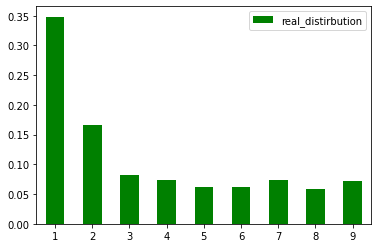

In [ ]:
ax = df_2.plot.bar(rot=0, color='green')

## Benford distirbution graph

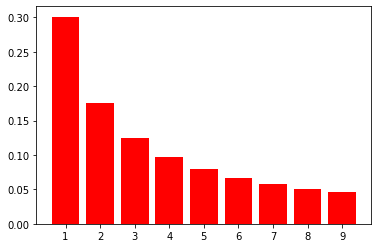

In [ ]:
import matplotlib.pyplot as plt
from math import log10
def benford(n):
    return log10(n+1) - log10(n)
x = [i for i in range(1, 10)]
results = [benford(i) for i in x]
df_all['benford'] = results
fig, ax = plt.subplots()
plt.bar(x, results, color='red')
plt.xticks(x, x)
ax_3 = plt.show()

## Equal Distirbution Graph

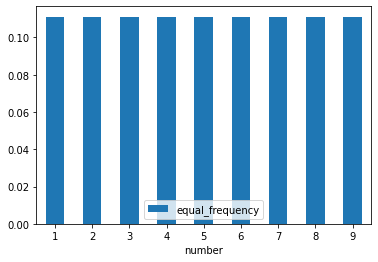

In [ ]:
data = {'number': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'equal_frequency': [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]}
df_3 = pd.DataFrame.from_dict(data)
df_all['equal'] = data['equal_frequency']
df_3
ax_1 = df_3.plot.bar(x='number', y='equal_frequency', rot=0)

## 2. plot 2 histograms for the relative errors for Models 1 and 2 (for each digit)


In [ ]:
df_all['benford_relative_errors'] = (df_all['real_distirbution'] - df_all['benford'])/ df_all['benford']
df_all['equal_relative_errors'] = (df_all['real_distirbution'] - df_all['equal'])/ df_all['equal']
df_all

,real_distirbution,benford,equal,benford_relative_errors,equal_relative_errors
1,0.348267,0.301030,0.111111,0.156918,2.134404
2,0.166560,0.176091,0.111111,-0.054129,0.499036
3,0.082739,0.124939,0.111111,-0.337765,-0.255351
4,0.074320,0.096910,0.111111,-0.233108,-0.331124
5,0.061775,0.079181,0.111111,-0.219826,-0.444024
6,0.062519,0.066947,0.111111,-0.066139,-0.437329
7,0.073711,0.057992,0.111111,0.271054,-0.336602
8,0.057751,0.051153,0.111111,0.129006,-0.480237
9,0.072358,0.045757,0.111111,0.581346,-0.348774


## RELATIVE ERROR OF BENFORD VALUES WITH REAL VALUES

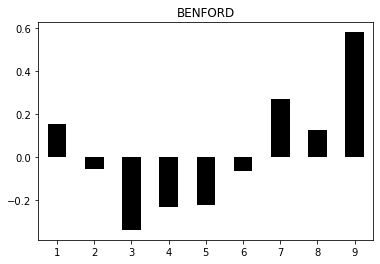

In [ ]:
ax_benford = df_all['benford_relative_errors'].plot.bar(rot=0, color='black', title='BENFORD')

## RELATIVE ERROR OF EQUAL VALUES WITH REAL VALUES

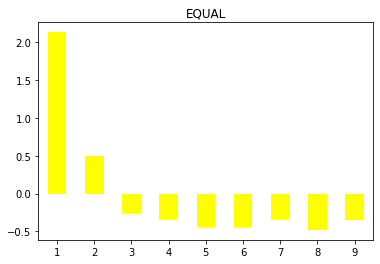

In [ ]:
ax_equal = df_all['equal_relative_errors'].plot.bar(rot=0, color='yellow', title='EQUAL')

## 3. Compute RMSE (root mean squared error) for model 1 and 2. Which model is closer to the real distribution?

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_1 = sqrt(mean_squared_error(df_2['real_distirbution'], df_3['equal_frequency']))
rmse_2 = sqrt(mean_squared_error(df_2['real_distirbution'], results))
print("RMSE between real distirbution and equal distirbutiond----> \n", rmse_1)
print("\n \n RMSE between real distirbution and equal distirbutiond----> \n", rmse_2)


RMSE between real distirbution and equal distirbutiond----> 
 0.08945460709433146

 
 RMSE between real distirbution and equal distirbutiond----> 
 0.025677879113395724


## 4. Take 3 categories of your choice For each of these categories do the following: (a) compute F , P and π. (b) using RMSE as a ”distance” metric, for which of these chosen three coun- tries is the distribution ”closest” to equal weight P ?

In [ ]:
def get_category_distirbution(df):
  df['real_distirbution'] = df['SellPrice'].astype(str).str[:1]
  df = df[df.real_distirbution != 'N']
  real_dist = df['real_distirbution'].value_counts(normalize=True)
  df_F_1 = real_dist.to_frame()
  df_F_1 = df_F_1.sort_index()
  return df_F_1

df_chosen = df[df['Category'].isin(['Westernwear-Women', 'Indianwear-Women', 'Lingerie&Nightwear-Women'])]
df_chosen_western = df_chosen[df['Category'].isin(['Westernwear-Women'])]
df_chosen_indian = df_chosen[df['Category'].isin(['Indianwear-Women'])]
df_chosen_lingerie = df_chosen[df['Category'].isin(['Lingerie&Nightwear-Women'])]

df_F_1 = get_category_distirbution(df_chosen_western)
df_F_2 = get_category_distirbution(df_chosen_indian)
df_F_3 = get_category_distirbution(df_chosen_lingerie)

rmse_western_equal = sqrt(mean_squared_error(df_F_1['real_distirbution'], df_3['equal_frequency']))
rmse_western_benford = sqrt(mean_squared_error(df_F_1['real_distirbution'], results))
rmse_indian_equal = sqrt(mean_squared_error(df_F_2['real_distirbution'], df_3['equal_frequency']))
rmse_indian_benford = sqrt(mean_squared_error(df_F_2['real_distirbution'], results))
rmse_lingerie_equal = sqrt(mean_squared_error(df_F_3['real_distirbution'], df_3['equal_frequency']))
rmse_lingerie_benford = sqrt(mean_squared_error(df_F_3['real_distirbution'], results))
print("Frequency distirbution of WESTERN WEAR \n", df_F_1)
print("\n \n Frequency distirbution of INDIAN WEAR \n", df_F_2)
print("\n \n Frequency distirbution of LINGERIE \n", df_F_3)

print("\n \n RMSE western with equal frequency---->", rmse_western_equal)
print("\n \n RMSE western with benford frequency---->", rmse_western_benford)
print("\n \n RMSE indian with equal frequency---->", rmse_indian_equal)
print("\n \n RMSE indian with benford frequency---->", rmse_indian_benford)
print("\n \n RMSE lingerie with equal frequency---->", rmse_lingerie_equal)
print("\n \n RMSE lingerie with benford frequency---->", rmse_lingerie_benford, "\n\n")


Frequency distirbution of WESTERN WEAR 
    real_distirbution
1           0.406416
2           0.131328
3           0.060251
4           0.063459
5           0.044411
6           0.056541
7           0.076391
8           0.063759
9           0.097444

 
 Frequency distirbution of INDIAN WEAR 
    real_distirbution
1           0.368020
2           0.188972
3           0.065965
4           0.060852
5           0.056942
6           0.056742
7           0.079298
8           0.061454
9           0.061754

 
 Frequency distirbution of LINGERIE 
    real_distirbution
1           0.255194
2           0.167442
3           0.098915
4           0.091783
5           0.104806
6           0.081240
7           0.086822
8           0.055504
9           0.058295

 
 RMSE western with equal frequency----> 0.10725489654674382

 
 RMSE western with benford frequency----> 0.05044208800559665

 
 RMSE indian with equal frequency----> 0.09912562868257971

 
 RMSE indian with benford frequency----> 0.03471527

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 5. Discuss your findings.

1. Westernwear has more prices starting with 1 compared to Indian wear and Lingerie wear.

2. Indian wear has more prices starting with 1's more than Lingerie wear

3. RMSE for all 3 categories is more with Benford values than equal values

4. For Real distirbution of the complete table, Benford values are approximate for the numbers 1, 2, 5, 6, and 8